# understanding data 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/kaggle/input/fitness-classification-dataset-synthetic/fitness_dataset.csv')

In [2]:
df.head(10)

age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0   56        152         65        69.6           117.0          NaN   
1   69        186         95        60.8           114.8          7.5   
2   46        192        103        61.4           116.4          NaN   
3   32        189         83        60.2           130.1          7.0   
4   60        175         99        58.1           115.8          8.0   
5   25        172         85        81.2           119.2          7.7   
6   78        193         83        79.6           132.5          7.4   
7   38        188         57        81.2           110.6          6.6   
8   56        164        108        70.1           140.9          9.1   
9   75        198         55        67.1           129.5          8.1   

   nutrition_quality  activity_index smokes gender  is_fit  
0               2.37            3.97     no      F       1  
1               8.77            3.19      0      F       1  
2               8.20            2.03      0      F       0  
3               6.18            3.68      0      M       1  
4               9.95            4.83    yes      F       1  
5               7.35            4.08    yes      M       0  
6               2.16            3.42    yes      F       0  
7               8.47            4.96      0      M       1  
8               4.15            2.06     no      F       0  
9               0.36            1.25      0      F       0

- We need to detect any zeros in the smoke fields.

In [3]:
# Get the shape of the dataset
print("Shape of the dataset:", df.shape)

# Get the column names
print("Column names:", df.columns)

# Get the data types of each column
print("Data types:", df.dtypes)

# Check for missing values
print("Missing values:", df.isnull().sum())


Shape of the dataset: (2000, 11)
Column names: Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
       'gender', 'is_fit'],
      dtype='object')
Data types: age                    int64
height_cm              int64
weight_kg              int64
heart_rate           float64
blood_pressure       float64
sleep_hours          float64
nutrition_quality    float64
activity_index       float64
smokes                object
gender                object
is_fit                 int64
dtype: object
Missing values: age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64


- We are gonna use the median in sleep hours. 

In [4]:
df.describe()

age   height_cm    weight_kg   heart_rate  blood_pressure  \
count  2000.000000  2000.00000  2000.000000  2000.000000     2000.000000   
mean     49.114000   174.53300    83.540500    70.288600      119.908850   
std      17.926564    14.37175    25.852534    11.846339       14.578032   
min      18.000000   150.00000    30.000000    45.000000       90.000000   
25%      34.000000   162.00000    64.000000    62.100000      109.700000   
50%      49.000000   174.00000    83.000000    70.250000      120.000000   
75%      65.000000   187.00000   102.000000    78.425000      129.800000   
max      79.000000   199.00000   250.000000   118.600000      171.200000   

       sleep_hours  nutrition_quality  activity_index       is_fit  
count  1840.000000        2000.000000     2000.000000  2000.000000  
mean      7.513315           5.035140        2.999040     0.399500  
std       1.502031           2.864156        1.136383     0.489918  
min       4.000000           0.000000        1.000000     0.000000  
25%       6.500000           2.547500        2.037500     0.000000  
50%       7.500000           5.065000        2.980000     0.000000  
75%       8.600000           7.470000        3.950000     1.000000  
max      12.000000          10.000000        4.990000     1.000000

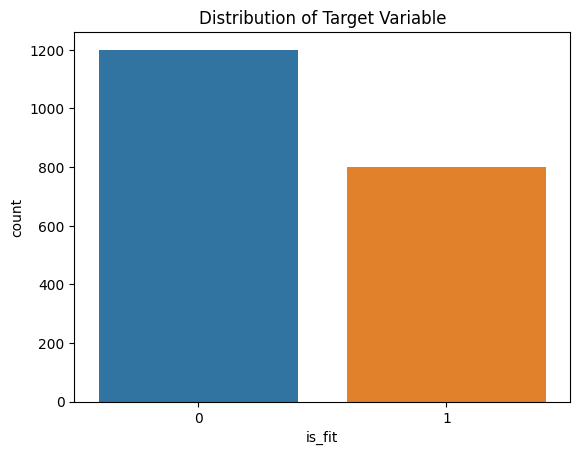

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


target_column = 'is_fit'  

# Plot the distribution of the target variable
sns.countplot(x=target_column, data=df)
plt.title('Distribution of Target Variable')
plt.show()


- almost balanced. There is no need for an imputation technique

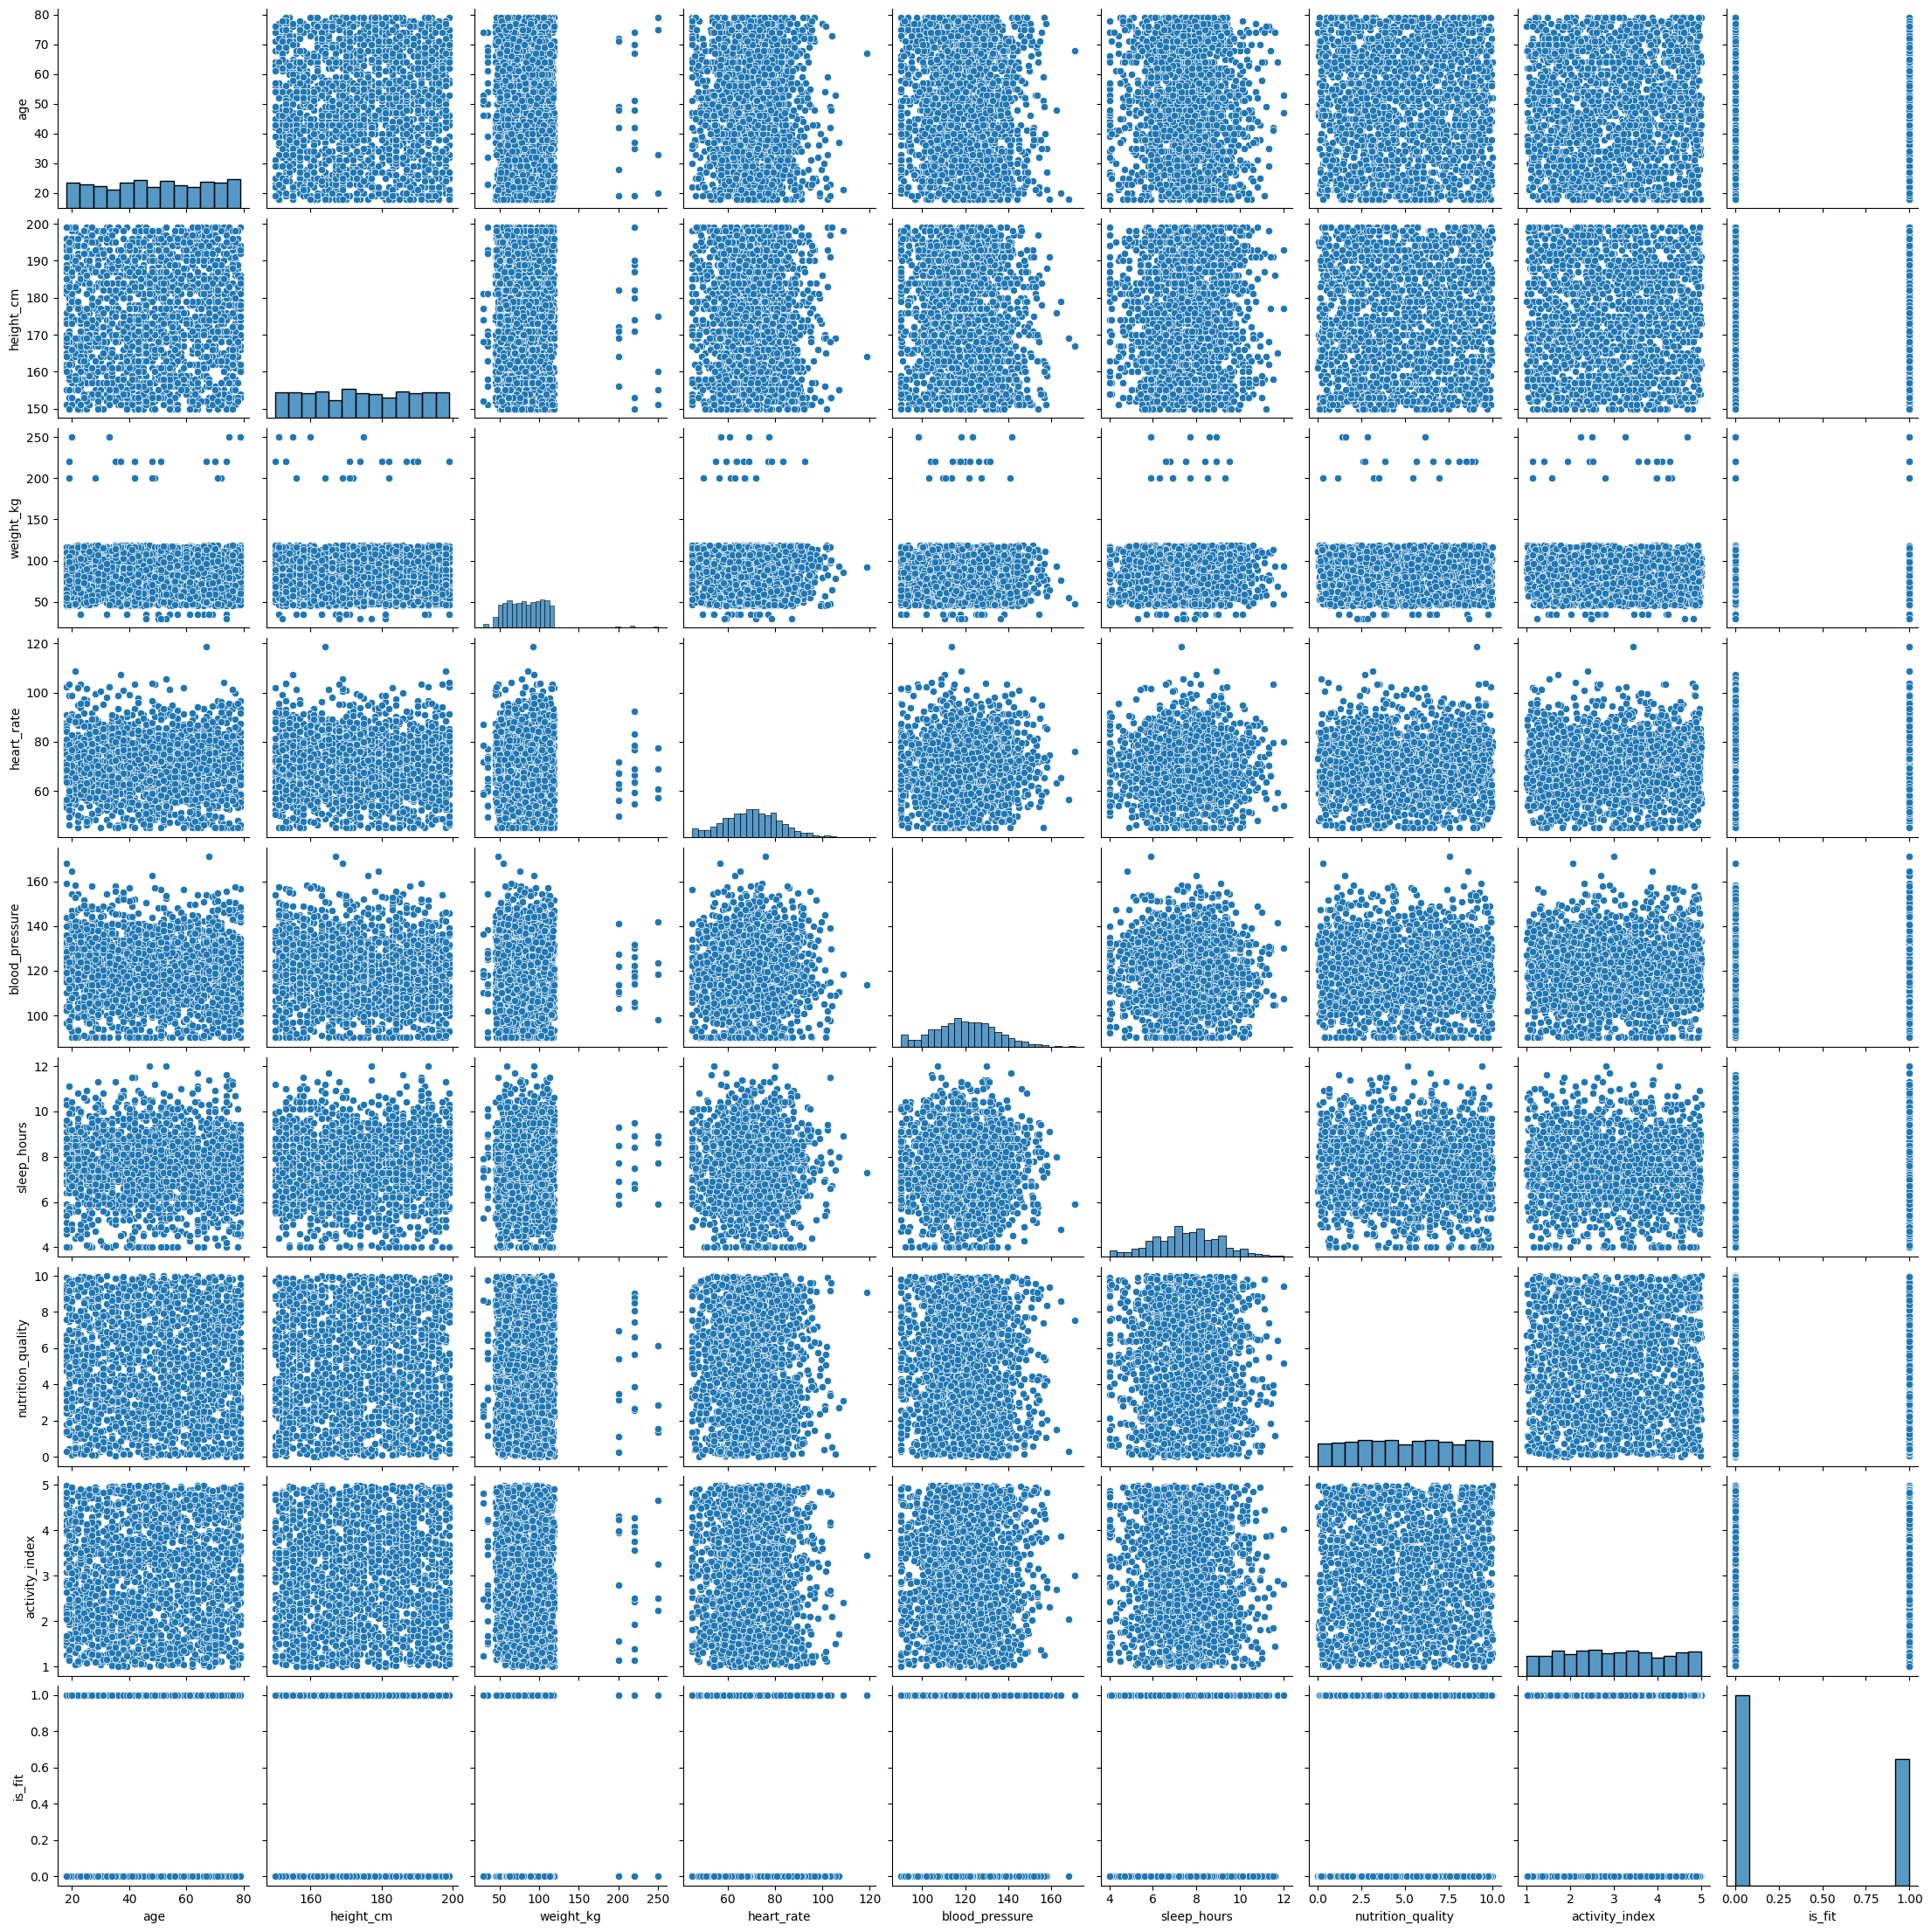

In [6]:
# Pairplot for numerical features
sns.pairplot(df)
plt.show()

# EDA

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

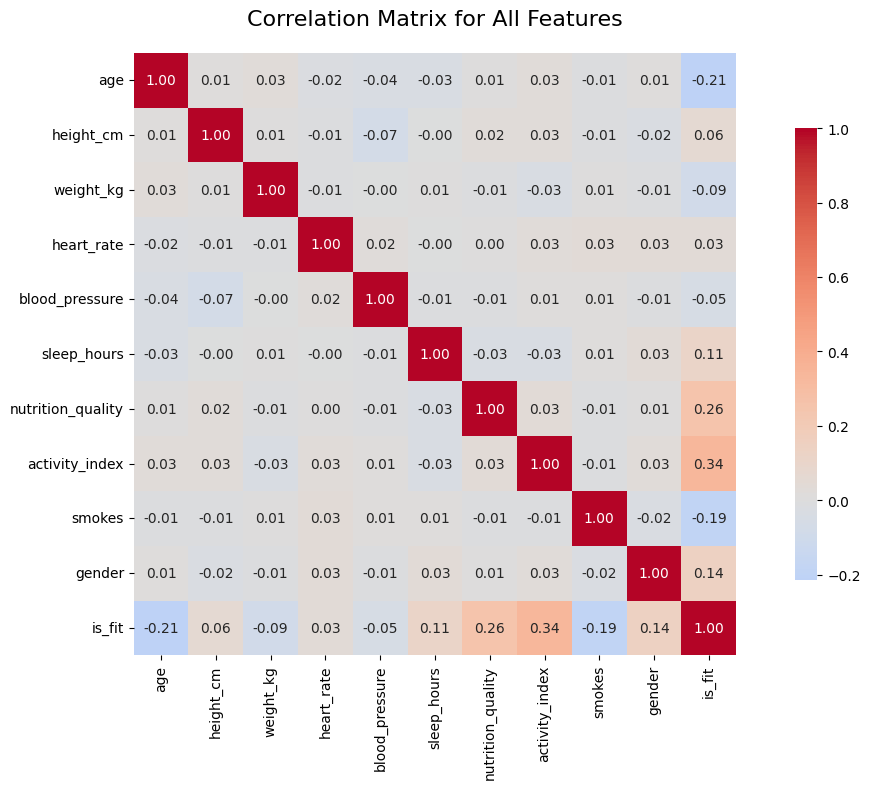

In [8]:
# Calculate correlation
corr = df_encoded.corr()

# Plot the heatmap in one figure
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Matrix for All Features", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

- Top positive correlation with is_fit:activity_index (0.34) → Not surprisingly, being active is strongly tied to being fit.
nutrition_quality (0.26) → Eating well shows moderate association.
sleep_hours (0.11) → Slight positive relationship.

- Top negative correlation with is_fit:age (-0.21) → Younger people are tending to be “fitter” here.
smokes (-0.19) → Smoking is a fitness downer.
weight_kg (-0.09) → Weak, but slightly negative association.



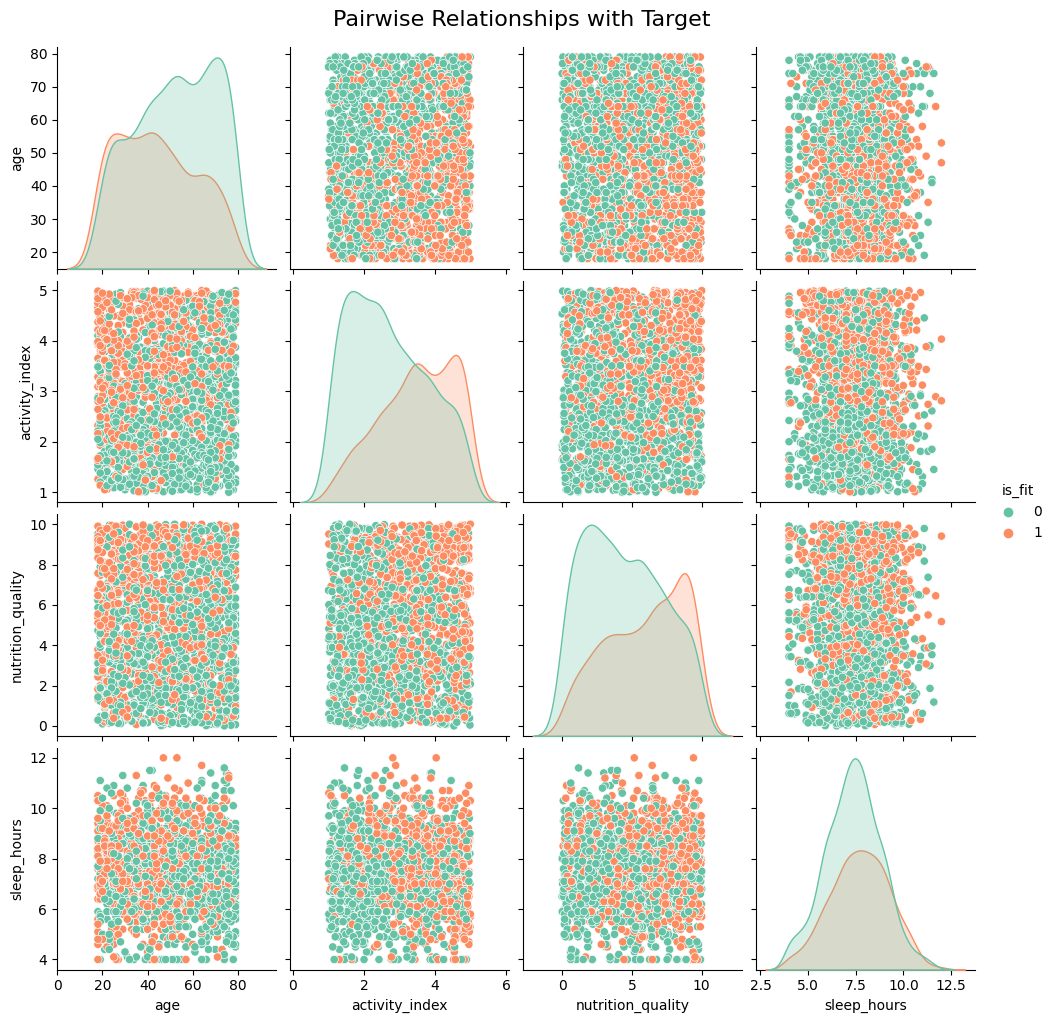

In [9]:
# Select only the most relevant or correlated features
features = ['age', 'activity_index', 'nutrition_quality', 'sleep_hours', 'smokes', 'is_fit']
sns.pairplot(df[features], hue='is_fit', diag_kind='kde', palette='Set2')
plt.suptitle("Pairwise Relationships with Target", y=1.02, fontsize=16)
plt.show()

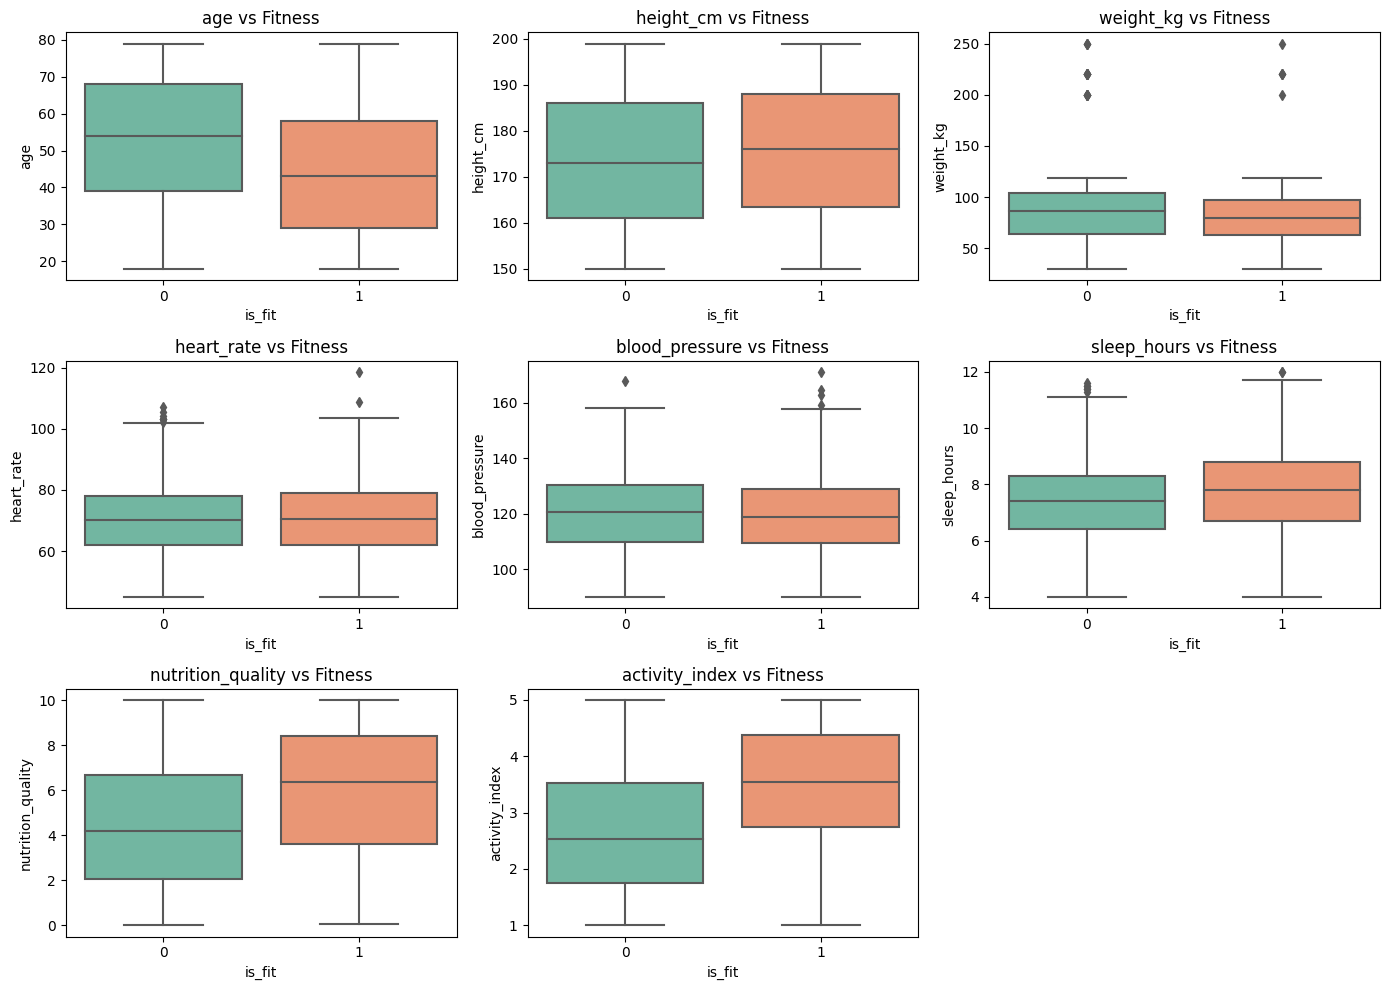

In [10]:
numeric_cols = ['age', 'height_cm', 'weight_kg', 'heart_rate', 
                'blood_pressure', 'sleep_hours', 'nutrition_quality', 'activity_index']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='is_fit', y=col, data=df, palette='Set2')
    plt.title(f"{col} vs Fitness")
plt.tight_layout()
plt.show()


- we have some outliers we need to detect later 

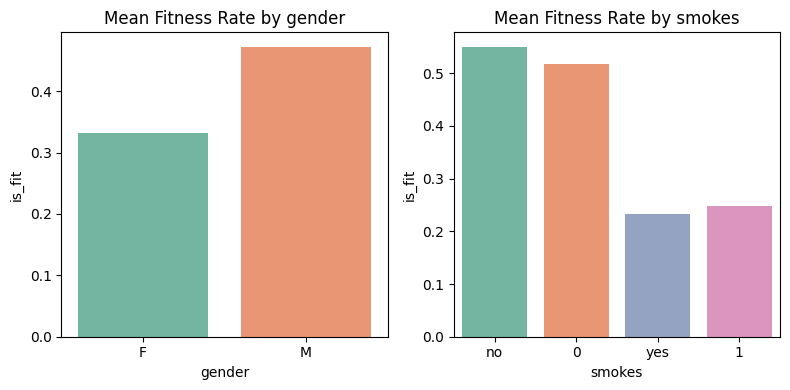

In [11]:
cat_cols = ['gender', 'smokes']
plt.figure(figsize=(8, 4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 2, i)
    sns.barplot(x=col, y='is_fit', data=df, palette='Set2', ci=None)
    plt.title(f"Mean Fitness Rate by {col}")
plt.tight_layout()
plt.show()


# outlier detection

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split




# Split before cleaning to avoid data leakage
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['is_fit'])

# Select numerical columns only (skip the target)
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('is_fit')

# Outlier removal using IQR method — applied only on train_df
clean_train_df = train_df.copy()
for col in numeric_cols:
    Q1 = clean_train_df[col].quantile(0.25)
    Q3 = clean_train_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only non-outliers in this column
    clean_train_df = clean_train_df[
        (clean_train_df[col] >= lower_bound) &
        (clean_train_df[col] <= upper_bound)
    ]

# Print shapes before and after cleaning
print(f"Train data before cleaning: {train_df.shape}")
print(f"Train data after cleaning: {clean_train_df.shape}")
print(f"Test data untouched: {test_df.shape}")




Train data before cleaning: (1600, 11)
Train data after cleaning: (1442, 11)
Test data untouched: (400, 11)


# null values handling

In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming clean_train_df and test_df are already in memory from your previous step

# Separate numerical and categorical columns (excluding target)
num_cols = clean_train_df.select_dtypes(include=['int64', 'float64']).columns.drop('is_fit')
cat_cols = clean_train_df.select_dtypes(include=['object', 'category']).columns

# Check missing counts before
print("Missing values BEFORE imputation (train):")
print(clean_train_df[num_cols.tolist() + cat_cols.tolist()].isna().sum())
print("Missing values BEFORE imputation (test):")
print(test_df[num_cols.tolist() + cat_cols.tolist()].isna().sum())

# Imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Fit on train, transform both
clean_train_df[num_cols] = num_imputer.fit_transform(clean_train_df[num_cols])
test_df[num_cols] = num_imputer.transform(test_df[num_cols])

clean_train_df[cat_cols] = cat_imputer.fit_transform(clean_train_df[cat_cols])
test_df[cat_cols] = cat_imputer.transform(test_df[cat_cols])

# Check missing counts after
print("Missing values AFTER imputation (train):")
print(clean_train_df[num_cols.tolist() + cat_cols.tolist()].isna().sum())
print("Missing values AFTER imputation (test):")
print(test_df[num_cols.tolist() + cat_cols.tolist()].isna().sum())

# Resulting shapes
print(f"Train shape after imputation: {clean_train_df.shape}")
print(f"Test shape after imputation:  {test_df.shape}")


Missing values BEFORE imputation (train):
age                  0
height_cm            0
weight_kg            0
heart_rate           0
blood_pressure       0
sleep_hours          0
nutrition_quality    0
activity_index       0
smokes               0
gender               0
dtype: int64
Missing values BEFORE imputation (test):
age                   0
height_cm             0
weight_kg             0
heart_rate            0
blood_pressure        0
sleep_hours          33
nutrition_quality     0
activity_index        0
smokes                0
gender                0
dtype: int64
Missing values AFTER imputation (train):
age                  0
height_cm            0
weight_kg            0
heart_rate           0
blood_pressure       0
sleep_hours          0
nutrition_quality    0
activity_index       0
smokes               0
gender               0
dtype: int64
Missing values AFTER imputation (test):
age                  0
height_cm            0
weight_kg            0
heart_rate           0
blood

In [14]:
clean_train_df.head()

age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
402   42.0      175.0       65.0        72.9           151.9          7.8   
686   37.0      153.0      111.0        58.9           128.0          8.8   
1567  53.0      193.0       64.0        63.6            97.9          9.9   
1628  66.0      181.0       84.0        69.6           132.3          5.3   
1348  53.0      193.0       95.0        70.2           116.9          5.2   

      nutrition_quality  activity_index smokes gender  is_fit  
402                7.68            4.42     no      M       1  
686                4.49            4.14     no      M       1  
1567               8.84            4.81    yes      F       1  
1628               5.75            1.09      0      M       0  
1348               0.92            4.56     no      M       1

# Encoding and scaking

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
# Features & Target
X_train = clean_train_df.drop('is_fit', axis=1)
y_train = clean_train_df['is_fit']
X_test = test_df.drop('is_fit', axis=1)
y_test = test_df['is_fit']

# Column types
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Build pipeline (preprocessing only for now)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit on train, transform train & test
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

print("Shape after preprocessing:")
print(f"Train: {X_train_processed.shape}")
print(f"Test:  {X_test_processed.shape}")

Shape after preprocessing:
Train: (1442, 14)
Test:  (400, 14)


# ML pipeline

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = []

for name, model in models.items():
    # Build full pipeline
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))

# Summary table
print("=== Model Comparison ===")
for name, acc in results:
    print(f"{name:30} {acc:.4f}")


Logistic Regression Accuracy: 0.7725
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       240
           1       0.76      0.63      0.69       160

    accuracy                           0.77       400
   macro avg       0.77      0.75      0.75       400
weighted avg       0.77      0.77      0.77       400

Random Forest Accuracy: 0.7575
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       240
           1       0.76      0.57      0.65       160

    accuracy                           0.76       400
   macro avg       0.76      0.73      0.73       400
weighted avg       0.76      0.76      0.75       400

Gradient Boosting Accuracy: 0.7625
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       240
           1       0.76      0.59      0.67       160

    accuracy                           0.76       400
   macro avg       0.76  